In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/',force_remount=False)

Mounted at /content/drive/


In [ ]:
import numpy as np 
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import seaborn as sn
import altair as alt
%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.base import TransformerMixin
import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score



import string
from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English


In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("fake_job_postings.csv")

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for colu in columns:
  del df[colu]

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.fillna('',inplace=True)

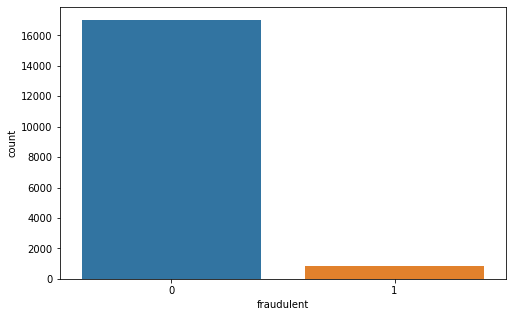

In [ ]:
plt.figure(figsize=(8,5))
sn.countplot(x='fraudulent', data=df)
plt.show()

In [ ]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
exp = dict(df.required_experience.value_counts())
del exp['']


In [ ]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

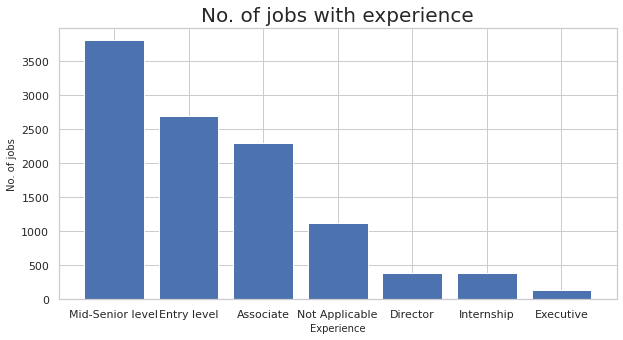

In [ ]:
plt.figure(figsize=(10,5))
sn.set_theme(style='whitegrid')
plt.bar(exp.keys(),exp.values())
plt.title('No. of jobs with experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('No. of jobs',size=10)
plt.show()

In [ ]:
def split(location):
  l = location.split(',')
  return l[0]
df['country'] = df.location.apply(split) 

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
countr= dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

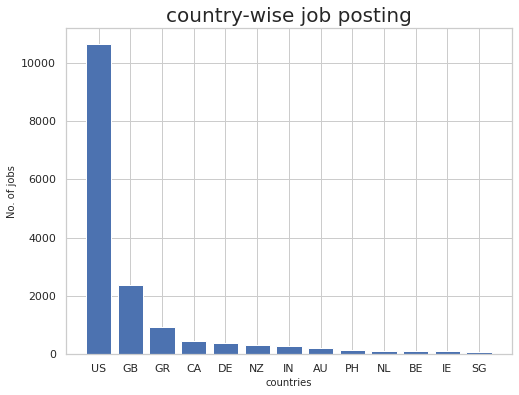

In [ ]:
plt.figure(figsize=(8,6))
plt.title('country-wise job posting',size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No. of jobs',size=10)
plt.xlabel('countries',size=10)
plt.show()

In [ ]:
edu=dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'Education')

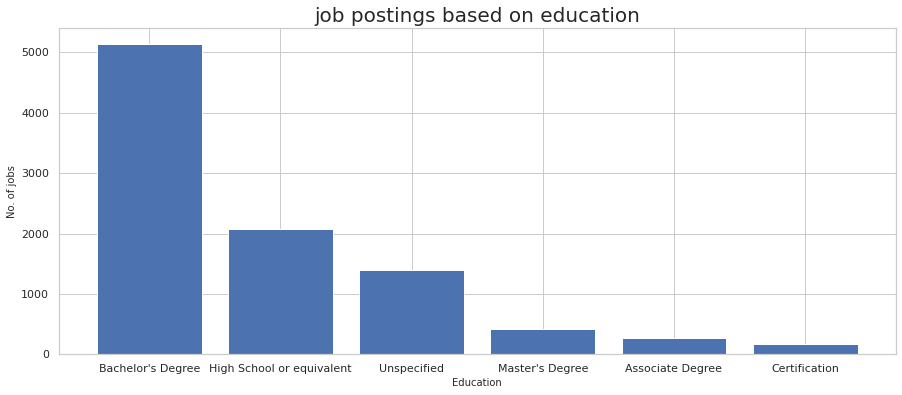

In [ ]:
plt.figure(figsize=(15,6))
plt.title('job postings based on education',size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No. of jobs',size=10)
plt.xlabel('Education',size=10)

In [ ]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [ ]:
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [ ]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
df.shape

(17880, 2)

In [ ]:
#Sdf.to_csv('df_cleaned.csv')

In [ ]:
fraudjobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text

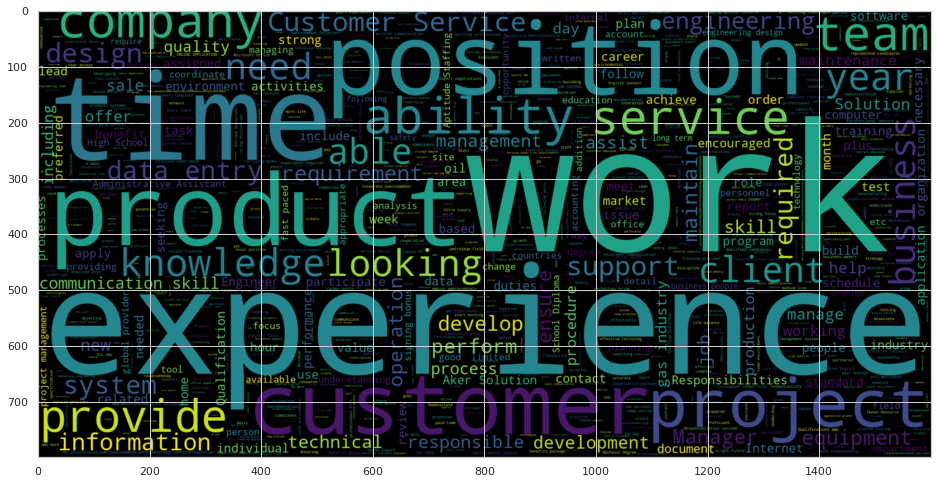

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height=800, stopwords = STOPWORDS) .generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

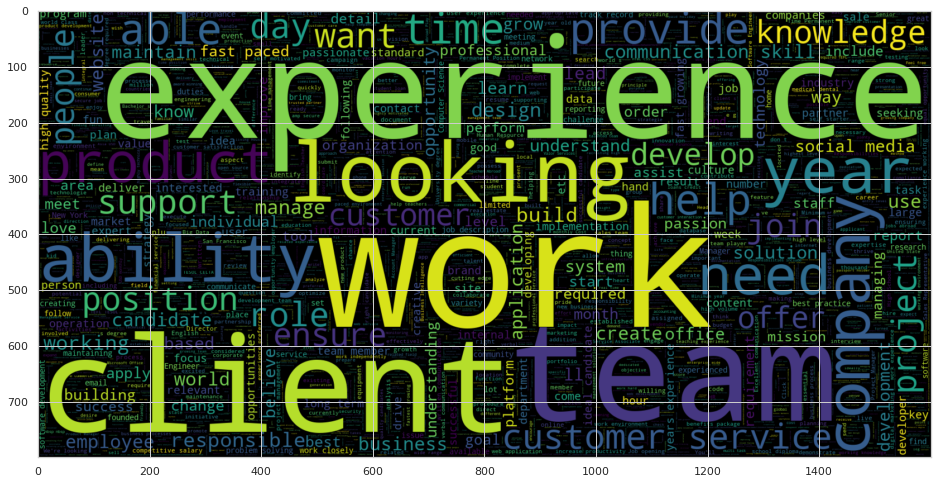

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height=800, stopwords = STOPWORDS) .generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
!pip install spacy && python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-01 00:33:57.728347: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 34.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# spacy tokenizer

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

# Custom cleanning class
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    # Removing spaces and converting text into lowercase

    return text.strip().lower()

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
df.head()

,fraudulent,text
0,0,"marketing intern we're food52, and we've creat..."
1,0,customer service - cloud video production 90 s...
2,0,commissioning machinery assistant (cma) valor ...
3,0,account executive - washington dc our passion ...
4,0,bill review manager spotsource solutions llc i...


In [ ]:
x=df['text']
y=df['fraudulent']
  

In [ ]:
x

0        marketing intern we're food52, and we've creat...
1        customer service - cloud video production 90 s...
2        commissioning machinery assistant (cma) valor ...
3        account executive - washington dc our passion ...
4        bill review manager spotsource solutions llc i...
                               ...                        
17875    account director - distribution  vend is looki...
17876    payroll accountant weblinc is the e-commerce p...
17877    project cost control staff engineer - cost con...
17878    graphic designer  nemsia studios is looking fo...
17879    web application developers vend is looking for...
Name: text, Length: 17880, dtype: object

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

14360    0
7053     0
17870    0
9228     0
4160     0
        ..
9225     0
13123    0
9845     1
10799    0
2732     0
Name: fraudulent, Length: 14304, dtype: int64

In [ ]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)

In [ ]:
tfid_x_train

<14304x91744 sparse matrix of type '<class 'numpy.float64'>'
	with 2380303 stored elements in Compressed Sparse Row format>

In [ ]:
tfid_x_test = tfvect.transform(x_test)

In [ ]:
tfid_x_test

<3576x91744 sparse matrix of type '<class 'numpy.float64'>'
	with 589961 stored elements in Compressed Sparse Row format>

# LOGISTIC REGRESSION

In [ ]:
 #Traing the model: LoisticRegression
model1=LogisticRegression()

In [ ]:
model1.fit(tfid_x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy score on the test data
y_predict1=model1.predict(tfid_x_test)
test_data_accuracy=accuracy_score(y_predict1,y_test)

In [ ]:
print('Accuracy score of the test data:',test_data_accuracy)

Accuracy score of the test data: 0.9762304250559284


In [ ]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_predict1))
print("Classification Report\n")
print(classification_report(y_test, y_predict1))

Classification Accuracy: 0.9762304250559284
Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       0.94      0.48      0.63       153

    accuracy                           0.98      3576
   macro avg       0.96      0.74      0.81      3576
weighted avg       0.98      0.98      0.97      3576



# support vector machine

In [ ]:
from sklearn import svm

In [ ]:
#Traing the model: Support vector machine
model2=svm.SVC(kernel='linear')

In [ ]:
model2.fit(tfid_x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_predict2=model2.predict(tfid_x_test)

In [ ]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_predict2))
print("Classification Report\n")
print(classification_report(y_test, y_predict2))

Classification Accuracy: 0.985738255033557
Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3423
           1       0.95      0.71      0.81       153

    accuracy                           0.99      3576
   macro avg       0.97      0.85      0.90      3576
weighted avg       0.99      0.99      0.98      3576



# DECISION TREE CLASSIFIER

In [ ]:
#instantiate a Decision Tree Classifier
model3 = DecisionTreeClassifier()

In [ ]:
#train the model 
# using count_train (timing it with an IPython "magic command")

model3.fit(tfid_x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# make class predictions for X_test_dtm
y_predict3 = model3.predict(tfid_x_test)

In [ ]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_predict3))
print("Classification Report\n")
print(classification_report(y_test, y_predict3))

Classification Accuracy: 0.9753914988814317
Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3423
           1       0.70      0.75      0.72       153

    accuracy                           0.98      3576
   macro avg       0.84      0.87      0.85      3576
weighted avg       0.98      0.98      0.98      3576



#RANDOM FOREST

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model4=RandomForestClassifier()

In [ ]:
model4.fit(tfid_x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict4= model4.predict(tfid_x_test)

In [ ]:
print("Classification Accuracy:", accuracy_score(y_test, y_predict4))
print("Classification Report\n")
print(classification_report(y_test, y_predict4))

Classification Accuracy: 0.9848993288590604
Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3423
           1       0.97      0.67      0.79       153

    accuracy                           0.98      3576
   macro avg       0.98      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



In [ ]:
def fake_jobs_det(jobs):
    input_data = [jobs]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = model4.predict(vectorized_input_data)
    print(prediction)

In [ ]:
fake_jobs_det('Are you looking to continue your Career working for a Boutique Agency who are located in Scarborough North Yorkshire.The Agency operates within the UK Automotive Market which is experiencing substantial growth and is forecasted to do so for the foreseeable future. The Partners are Industry expert and have been operating for many years, albeit within Search and selection. The time is now right to offer a Full Service Package.')

[0]


In [ ]:
fake_jobs_det('The group has raised a fund for the purchase of homes in the Southeast. The student on this project will help them build their investments from the ground up and will help with the analysis and modeling of their investments. Â We should be looking for someone with a strong general finance skills and has a lot of entrepreneurial ability.')

[1]


In [ ]:
fake_jobs_det('IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:Â Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies safety hazards and recommends solutions.Follows environmental compliance work practices.Identifies environmental non-compliance problems and assist in implementing solutions.Assists other team members and works with all departments to support generating station in achieving their performance goals.Trains other team members in the areas of instrumentation, control, and electrical systems.Performs housekeeping assignments, as directed.Conduct equipment and system tagging according to company and plant rules and regulations.Perform equipment safety inspections, as required, and record results as appropriate.Â Participate in small construction projects.Â Read and interpret drawings, sketches, prints, and specifications, as required.Orders parts as needed to affect maintenance and repair.Performs Operations tasks on an as-needed basis and other tasks as assigned.Available within a reasonable response time for emergency call-ins and overtime, plus provide acceptable off-hour contact by phone and company pager.Â Â Â Â Â Â Â Â Â Excellent Verbal and Written Communications Skills:Ability to coordinate work activities with other team members on technical subjects across job families.Ability to work weekends, holidays, and rotating shifts, as required.')

[0]


In [ ]:
fake_jobs_det('Director of Technical Operations Aptitude Staffing Solutions has redesigned the recruiting wheel. Our innovative new platform cuts the recruiting time in half, yields scientifically-proven results and clients and candidates enjoy a pleasant experience through advanced, simple to use technology and a tenured, industry-experienced recruiting team. Join us in a fresh new experience of leveraging your career...the way it should be!Â All represented candidates enjoy the following perks:Expert negotiations, maximizing total compensation packageÂ Signing bonus by Aptitude Staffing in addition to client signing bonus (if applicable)1 Year access to AnyPerkRelocation Services for out of town candidatesContinued education in your area of profession, seminars, workshops and other skill development eventsÂ Contract employees receive quarterly bonuses for the duration of their projectÂ Direct-Hire employees receive double bonues ($2,000) per referred/recruited candidate into their newly appointed companyAll candidates are encouraged to participate in ourÂ Referral Bonus ProgramÂ &amp; earnÂ $500 - $1,000Â per hired referralÂ  Â  Â  Â  Â  Â Â  Director of Software Engineerings newly forming New York development team, you will be a â€œplayer-coachâ€ who will contribute to and drive high-level architecture and planning, manage day-to-day issues, as well as roll up your sleeves and code when necessary.Responsibilities:Â Â Inspire, mentor and lead our superb 30+ person engineering team using your experience and deep understanding of both leading-edge technologies and of motivation and leadership;Drive the aggressive growth and organization of Software Engineering as we double in size again over the next year;Contribute new technical insights and help decide design directions, while preserving the core cultural values that define #URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389f1bbaf2a1cb071e3f2b6e7e# Engineering today, including: high level of personal performance; mutual trust; taking personal responsibility; flat &amp; informal organization; integrity; and a mutually supportive environment. Requirements:Â Â At least 10+ years in software development and increasing team management responsibilitiesStrong technical skills, including object-oriented design skills, familiarity with developing sophisticated and scalable web services infrastructures, high-performance backend platformsBS or MS in CS or Engineering desirableExcellent hands-on experience in C/C++ or JavaStrong familiarity with Linux, MySQL, and modern big data management approaches is very useful. With headquarters in San Mateo, CA and offices around the world, is one of the leading technology companies in the high-growth video advertising industry. Comscore consistently ranks us (along with YouTube and Hulu) as one of the top 3 video ad platforms. We are experiencing explosive demand for our platform and services, and this is driving our aggressive growth in all parts of the company. We have doubled in size in the past year, and our growth has created a new opportunity for an aggressive, hands-on and visionary software leader who can help us grow even faster.')

[1]


In [ ]:
import pickle

In [ ]:
# Saving model to disk
#pickle.dump(model4, open('model4.pkl','wb'))